# Wk18-Lecture01-CodeAlong v2 (UFOs)

## Learning Objectives

- By the end of this CodeAlong, students will be able to:
    - Create date time indices
    - Resample at various frequencies
    - Impute null values for time series 
    - Convert wide-form data to long-form
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

## Datetime Objects

In Python, we will deal with 2 types of date/time objects:
- Python datetime
- Panda's datetime indices

In [2]:
import datetime as dt

In [3]:
# Get Today's date (ONLY) from python's datetime.date module
today_date = dt.date.today()
today_date

datetime.date(2023, 1, 30)

In [4]:
# Printed dt objects look very different!
print(today_date)

2023-01-30


In [5]:
# Get Today's date(&time) from python's datetime.datetime module
today_datetime = dt.datetime.today()
today_datetime

datetime.datetime(2023, 1, 30, 22, 53, 4, 354099)

In [6]:
print(today_datetime)

2023-01-30 22:53:04.354099


### Datetime Formats

- Datetime objects have a `.strftime()` method (string-format-time)

In [7]:
## Month/Day/Year 24Hour Time
mo_day_yr_24hr_time_fmt = "%m/%d/%Y %T"
today_dt_24hr_str = today_datetime.strftime(mo_day_yr_24hr_time_fmt)
today_dt_24hr_str

'01/30/2023 22:53:04'

In [8]:
## Monday/Day/Year 12 Hour Time (+AM/PM)
mo_day_yr_12hr_time_fmt =  "%m/%d/%Y %I:%M:%S %p"

today_dt_12hr_str = today_datetime.strftime(mo_day_yr_12hr_time_fmt)
today_dt_12hr_str

'01/30/2023 10:53:04 PM'

> `.strftime` returns a STRING

In [9]:
type(today_dt_24hr_str)

str

### Creating Datetime Objects

- Python datetime classes need date info as numeric data.

In [10]:
## Our current date
today_dt_24hr_str

'01/30/2023 22:53:04'

In [11]:
## dt.datetime expects numeric data 
try:
    dt.datetime(today_dt_24hr_str)
except Exception as e:
    display(e)

TypeError('an integer is required (got type str)')

> - We *could* split our string date into pieces...


In [12]:
## separate the date vs time using " "
split_date, split_time = today_dt_24hr_str.split(" ")
print(split_date)
print(split_time)

01/30/2023
22:53:04


In [13]:
## Separate the split_date using "/"
mo,day,yr = split_date.split('/')
mo,day,yr

('01', '30', '2023')

In [14]:
## Separate the split_time using ":"
hour,minute,sec = split_time.split(":")
hour,minute,sec

('22', '53', '04')

> - and then manually convert to int and pass into datetime function...

In [15]:
## and manually pass in the integer versions of each piece...
converted_date_python = dt.datetime(int(yr),int(mo),int(day),
                                    int(hour),int(minute),int(sec))
converted_date_python

datetime.datetime(2023, 1, 30, 22, 53, 4)

>- **OR we could just use `pd.to_datetime`...**

In [16]:
## But pd.to_datetime can do that for us! 
converted_date_pandas = pd.to_datetime(today_dt_24hr_str)
converted_date_pandas

Timestamp('2023-01-30 22:53:04')

> We will use pandas datetime objects/functions whenever possible, as they save us a lot of time!

### Comparing Python vs. Pandas Datetime Objects

In [17]:
## Python Datetime 
print(type(converted_date_python))

## Displaying vs printing
display(converted_date_python)
print(converted_date_python)

<class 'datetime.datetime'>


datetime.datetime(2023, 1, 30, 22, 53, 4)

2023-01-30 22:53:04


In [18]:
## Panda's Timestamp
print(type(converted_date_pandas))

## Displaying vs printing
display(converted_date_pandas)
print(converted_date_pandas)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2023-01-30 22:53:04')

2023-01-30 22:53:04


## Datetime Index - Pandas

### UFO Sightings

- UFO Sightings: https://www.kaggle.com/datasets/NUFORC/ufo-sightings 

In [19]:
ufo  = pd.read_csv("Data/ufos-kaggle/scrubbed.csv", low_memory=False)
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [20]:
# ufo.columns

In [21]:
# # fix empty spaces in columns
# ufo.columns = ufo.columns.str.strip()
# ufo.columns

## Using pd.to_datetime

In [22]:
ufo['date posted'] = pd.to_datetime(ufo["date posted"])
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556


In [23]:
ufo['datetime'] = pd.to_datetime(ufo["datetime"])
ufo

ParserError: hour must be in 0..23: 10/11/2006 24:00 present at position 388

- Can use the `errors` argument for pd.to_datetime:
    - "raise" (default): raise an exception when errors happen
    - 'ignore': ignores the errors and returns the original value for that row. 
        - NOT RECOMMENDED: the entire column will not be datetime.
    - 'coerce': convert any bad datetime values to null values (NaT - NotATime)

In [24]:
##check nulls before coercing errors
ufo.isna().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [25]:
## saving a copy of original datetime column
ufo['datetime-original'] = ufo['datetime'].copy()
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime-original
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,10/10/1949 20:30
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,10/10/1949 21:00
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,10/10/1955 17:00
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,10/10/1956 21:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,10/10/1960 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,9/9/2013 21:15
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,9/9/2013 22:00
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,9/9/2013 22:00
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,9/9/2013 22:20


In [26]:
ufo["datetime"] = pd.to_datetime(ufo["datetime"], errors='coerce')
ufo["datetime"]

0       1949-10-10 20:30:00
1       1949-10-10 21:00:00
2       1955-10-10 17:00:00
3       1956-10-10 21:00:00
4       1960-10-10 20:00:00
                ...        
80327   2013-09-09 21:15:00
80328   2013-09-09 22:00:00
80329   2013-09-09 22:00:00
80330   2013-09-09 22:20:00
80331   2013-09-09 23:00:00
Name: datetime, Length: 80332, dtype: datetime64[ns]

In [27]:
ufo['datetime'].isna().sum()

694

In [28]:
bad_rows = ufo[ufo['datetime'].isna()]
bad_rows

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime-original
388,NaT,rome,ny,us,oval,120,a min or two,I was walking from the garage to the house&#44...,2007-02-01,43.2127778,-75.456111,10/11/2006 24:00
693,NaT,chulucanas-piura la vieja (peru),NaN,NaN,other,6312000,2 years,go to: http://www.24horas.com.pe/data/videos/...,2003-03-04,-5.129547,-80.120569,10/1/2001 24:00
962,NaT,novi,mi,us,triangle,300,5 minutes,V shaped and 8 big and very brite lights&#44mo...,2012-10-30,42.4805556,-83.475556,10/1/2012 24:00
1067,NaT,salatiga (indonesia),NaN,NaN,disk,22,22 seconds,UFO in Salatiga&#44Indonesia,2003-10-31,-7.33683,110.498817,10/12/2003 24:00
1221,NaT,cincinnati,oh,us,fireball,300,3-5 minutes,A bright orange light split into four&#44 did ...,2013-10-14,39.1619444,-84.456944,10/12/2013 24:00
...,...,...,...,...,...,...,...,...,...,...,...,...
79136,NaT,boonville,nc,us,cigar,10800,3+ hours,Unusual activity in our small community&#44 cr...,2013-09-09,36.2325000,-80.708333,9/4/2005 24:00
79137,NaT,redondo beach,ca,us,triangle,300,5 minutes,Triangulat UFO seen over Redondo Beach&#44 Cal...,2005-12-16,33.8491667,-118.387500,9/4/2005 24:00
79740,NaT,portsmouth,oh,us,changing,900,15 minutes,A bright red light hoovering in the sky.,2002-09-13,38.7316667,-82.997778,9/7/2002 24:00
79759,NaT,montrose,co,us,unknown,1200,20 minutes,Stationary object with three pulsating lights ...,2004-09-09,38.4783333,-107.875556,9/7/2004 24:00


In [29]:

pd.to_datetime(bad_rows['datetime-original'])

ParserError: hour must be in 0..23: 10/11/2006 24:00 present at position 0

In [30]:
ufo['fixed-datetime'] = ufo["datetime-original"].str.replace(" 24:00"," 23:59")
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime-original,fixed-datetime
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,10/10/1949 20:30,10/10/1949 20:30
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,10/10/1949 21:00,10/10/1949 21:00
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,10/10/1955 17:00,10/10/1955 17:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,10/10/1956 21:00,10/10/1956 21:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,10/10/1960 20:00,10/10/1960 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,9/9/2013 21:15,9/9/2013 21:15
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,9/9/2013 22:00,9/9/2013 22:00
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,9/9/2013 22:00,9/9/2013 22:00
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,9/9/2013 22:20,9/9/2013 22:20


In [32]:
ufo['datetime'] = pd.to_datetime(ufo["fixed-datetime"])
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime-original,fixed-datetime
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,10/10/1949 20:30,10/10/1949 20:30
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,10/10/1949 21:00,10/10/1949 21:00
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,10/10/1955 17:00,10/10/1955 17:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,10/10/1956 21:00,10/10/1956 21:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,10/10/1960 20:00,10/10/1960 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,9/9/2013 21:15,9/9/2013 21:15
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,9/9/2013 22:00,9/9/2013 22:00
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,9/9/2013 22:00,9/9/2013 22:00
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,9/9/2013 22:20,9/9/2013 22:20


### Setting datetime index

In [35]:
ufo_ts = ufo.set_index('datetime')
ufo_ts = ufo_ts.drop(columns=['datetime-original','fixed-datetime'])
ufo_ts

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...
2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444
2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500
2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444


In [37]:
# check the index to confirm its datetime
ufo_ts.index

DatetimeIndex(['1949-10-10 20:30:00', '1949-10-10 21:00:00',
               '1955-10-10 17:00:00', '1956-10-10 21:00:00',
               '1960-10-10 20:00:00', '1961-10-10 19:00:00',
               '1965-10-10 21:00:00', '1965-10-10 23:45:00',
               '1966-10-10 20:00:00', '1966-10-10 21:00:00',
               ...
               '2013-09-09 21:00:00', '2013-09-09 21:00:00',
               '2013-09-09 21:00:00', '2013-09-09 21:00:00',
               '2013-09-09 21:00:00', '2013-09-09 21:15:00',
               '2013-09-09 22:00:00', '2013-09-09 22:00:00',
               '2013-09-09 22:20:00', '2013-09-09 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=80332, freq=None)

# 🔥BOOKMARK: END OF 01/30/23
- Was copying the code below into the v1 notebook!

## Slicing (with a Datetime Index)

In [39]:
## Get all/any dates from 2013
ufo_ts.loc['2013']

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
2013-10-10 00:00:00,clifton,nj,NaN,light,60,<1 minute,Bright light&#33&#33,2013-10-14,40.858433,-74.163755
2013-10-10 02:32:00,palm harbor,fl,us,chevron,5,5 seconds,Tracking north to south at apx 2500 ft. A very...,2013-10-14,28.0777778,-82.763889
2013-10-10 05:00:00,aurburn,ky,NaN,triangle,600,10 minutes,Three bright lights over field.,2013-10-14,36.864209,-86.710273
2013-10-10 17:00:00,st. louis county,mo,us,light,10800,2-3 hours,Hovering bright object moving slowly around St...,2013-10-23,38.6272222,-90.197778
2013-10-10 17:10:00,ottawa (canada),on,ca,light,10,10 seconds,FATHER: My name is Eldon Trepanier&#44 and I ...,2013-10-14,45.416667,-75.700000
...,...,...,...,...,...,...,...,...,...,...
2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444
2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500
2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444


In [40]:
# Get all of january, 2013
ufo_ts.loc['January 2013']

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
2013-01-10 02:28:00,beaverdam (canada),nb,ca,unknown,180,3 minutes,This is the second night that I witnessed this...,2013-02-04,54.203611,-110.306667
2013-01-10 12:20:00,montgomery,tx,us,sphere,8,7-8 seconds,Small metallic sphere that changes into a larg...,2013-02-04,30.3880556,-95.696111
2013-01-10 13:00:00,mcgregor,mn,us,triangle,120,2 minutes,We seen an Explosion over Ft. Riply&#44 MN&#44...,2013-02-04,46.6066667,-93.313611
2013-01-10 18:10:00,milford,ma,us,triangle,60,1 minute,Black triangle glider&#44 forty feet off groun...,2013-02-04,42.1397222,-71.516667
2013-01-10 19:00:00,madison heights,mi,us,circle,10,8-10 seconds,Yellow/white orb hovering above I-696. Slowly...,2013-06-02,42.4858333,-83.105278
...,...,...,...,...,...,...,...,...,...,...
2013-01-09 17:20:00,wheatland,ia,us,light,420,7 minutes,Large bright multicolored twinkling light just...,2013-02-04,41.8316667,-90.838056
2013-01-09 17:20:00,wheatland,ia,us,light,420,7 minutes,Observed large multicolored twinking light hov...,2013-02-04,41.8316667,-90.838056
2013-01-09 18:00:00,medford,or,us,unknown,120,2 minutes,Sighting that seemed to be red balloons but wa...,2013-02-04,42.3266667,-122.874444


In [41]:
## Get January 01st, 2013 to March 16th 2013
ufo_ts.loc['01/01/13':'03/16/13']

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
2013-01-10 02:28:00,beaverdam (canada),nb,ca,unknown,180,3 minutes,This is the second night that I witnessed this...,2013-02-04,54.203611,-110.306667
2013-01-10 12:20:00,montgomery,tx,us,sphere,8,7-8 seconds,Small metallic sphere that changes into a larg...,2013-02-04,30.3880556,-95.696111
2013-01-10 13:00:00,mcgregor,mn,us,triangle,120,2 minutes,We seen an Explosion over Ft. Riply&#44 MN&#44...,2013-02-04,46.6066667,-93.313611
2013-01-10 18:10:00,milford,ma,us,triangle,60,1 minute,Black triangle glider&#44 forty feet off groun...,2013-02-04,42.1397222,-71.516667
2013-01-10 19:00:00,madison heights,mi,us,circle,10,8-10 seconds,Yellow/white orb hovering above I-696. Slowly...,2013-06-02,42.4858333,-83.105278
...,...,...,...,...,...,...,...,...,...,...
2013-03-09 22:20:00,yucaipa,ca,us,circle,180,3 minutes,At approximately 22:20PST&#44 multiple witness...,2013-04-12,34.0336111,-117.042222
2013-03-09 23:05:00,merced,ca,us,fireball,120,2 minutes,Orange bright light is sky,2013-05-15,37.3022222,-120.481944
2013-03-09 23:40:00,lebanon,pa,us,formation,10,10 seconds,A silent string formation&#448-10 amber lights...,2013-04-12,40.3408333,-76.411667


> Notice the earliest date is 2013-01-10

In [42]:
## Get just 01/10/13
ufo_ts.loc["01/10/2013"]

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
2013-01-10 02:28:00,beaverdam (canada),nb,ca,unknown,180,3 minutes,This is the second night that I witnessed this...,2013-02-04,54.203611,-110.306667
2013-01-10 12:20:00,montgomery,tx,us,sphere,8,7-8 seconds,Small metallic sphere that changes into a larg...,2013-02-04,30.3880556,-95.696111
2013-01-10 13:00:00,mcgregor,mn,us,triangle,120,2 minutes,We seen an Explosion over Ft. Riply&#44 MN&#44...,2013-02-04,46.6066667,-93.313611
2013-01-10 18:10:00,milford,ma,us,triangle,60,1 minute,Black triangle glider&#44 forty feet off groun...,2013-02-04,42.1397222,-71.516667
2013-01-10 19:00:00,madison heights,mi,us,circle,10,8-10 seconds,Yellow/white orb hovering above I-696. Slowly...,2013-06-02,42.4858333,-83.105278
2013-01-10 21:05:00,chantilly,va,us,formation,120,2 minutes,Approximately 20 orange lights in formation mo...,2013-02-04,38.8941667,-77.431389
2013-01-10 22:00:00,springfield,oh,us,fireball,1800,30 minutes,Fireballs over Springfield Ohio.,2013-02-04,39.9241667,-83.808889
2013-01-10 23:59:00,greene/lewiston,me,NaN,cigar,900,~15 minutes,Heading south from Greene&#44 Maine to Lewisto...,2013-02-04,44.09395,-70.158294


In [43]:
## cannot slice out more than 1 non-continuous dates
dates_to_keep = ['01/10/2013','01/13/2013']
ufo_ts.loc[dates_to_keep]

KeyError: "None of [Index(['01/10/2013', '01/13/2013'], dtype='object', name='datetime')] are in the [index]"

In [44]:
## But can use multiple .loc's in a loop or list comprehension
sliced_ufo_ts = pd.concat([ufo_ts.loc[i] for i in dates_to_keep])
sliced_ufo_ts

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
2013-01-10 02:28:00,beaverdam (canada),nb,ca,unknown,180,3 minutes,This is the second night that I witnessed this...,2013-02-04,54.203611,-110.306667
2013-01-10 12:20:00,montgomery,tx,us,sphere,8,7-8 seconds,Small metallic sphere that changes into a larg...,2013-02-04,30.3880556,-95.696111
2013-01-10 13:00:00,mcgregor,mn,us,triangle,120,2 minutes,We seen an Explosion over Ft. Riply&#44 MN&#44...,2013-02-04,46.6066667,-93.313611
2013-01-10 18:10:00,milford,ma,us,triangle,60,1 minute,Black triangle glider&#44 forty feet off groun...,2013-02-04,42.1397222,-71.516667
2013-01-10 19:00:00,madison heights,mi,us,circle,10,8-10 seconds,Yellow/white orb hovering above I-696. Slowly...,2013-06-02,42.4858333,-83.105278
2013-01-10 21:05:00,chantilly,va,us,formation,120,2 minutes,Approximately 20 orange lights in formation mo...,2013-02-04,38.8941667,-77.431389
2013-01-10 22:00:00,springfield,oh,us,fireball,1800,30 minutes,Fireballs over Springfield Ohio.,2013-02-04,39.9241667,-83.808889
2013-01-10 23:59:00,greene/lewiston,me,NaN,cigar,900,~15 minutes,Heading south from Greene&#44 Maine to Lewisto...,2013-02-04,44.09395,-70.158294
2013-01-13 00:10:00,monterrey (mexico),NaN,NaN,light,900,15 minutes,Red light approaching stopped his movement.,2013-02-04,25.686614,-100.316113


### Selecting Our Final TS

In [45]:
df_ts = ufo_ts.loc["2013":"2014"]
df_ts

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
2013-10-10 00:00:00,clifton,nj,NaN,light,60,<1 minute,Bright light&#33&#33,2013-10-14,40.858433,-74.163755
2013-10-10 02:32:00,palm harbor,fl,us,chevron,5,5 seconds,Tracking north to south at apx 2500 ft. A very...,2013-10-14,28.0777778,-82.763889
2013-10-10 05:00:00,aurburn,ky,NaN,triangle,600,10 minutes,Three bright lights over field.,2013-10-14,36.864209,-86.710273
2013-10-10 17:00:00,st. louis county,mo,us,light,10800,2-3 hours,Hovering bright object moving slowly around St...,2013-10-23,38.6272222,-90.197778
2013-10-10 17:10:00,ottawa (canada),on,ca,light,10,10 seconds,FATHER: My name is Eldon Trepanier&#44 and I ...,2013-10-14,45.416667,-75.700000
...,...,...,...,...,...,...,...,...,...,...
2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444
2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500
2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444


In [46]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9297 entries, 2013-10-10 00:00:00 to 2013-09-09 23:00:00
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   city                  9297 non-null   object        
 1   state                 8960 non-null   object        
 2   country               8437 non-null   object        
 3   shape                 9173 non-null   object        
 4   duration (seconds)    9297 non-null   object        
 5   duration (hours/min)  9297 non-null   object        
 6   comments              9295 non-null   object        
 7   date posted           9297 non-null   datetime64[ns]
 8   latitude              9297 non-null   object        
 9   longitude             9297 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 799.0+ KB


In [47]:
## Need to convert duration to numeric 
df_ts['duration (seconds)'] = df_ts['duration (seconds)'].astype(float)
df_ts

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
2013-10-10 00:00:00,clifton,nj,NaN,light,60.0,<1 minute,Bright light&#33&#33,2013-10-14,40.858433,-74.163755
2013-10-10 02:32:00,palm harbor,fl,us,chevron,5.0,5 seconds,Tracking north to south at apx 2500 ft. A very...,2013-10-14,28.0777778,-82.763889
2013-10-10 05:00:00,aurburn,ky,NaN,triangle,600.0,10 minutes,Three bright lights over field.,2013-10-14,36.864209,-86.710273
2013-10-10 17:00:00,st. louis county,mo,us,light,10800.0,2-3 hours,Hovering bright object moving slowly around St...,2013-10-23,38.6272222,-90.197778
2013-10-10 17:10:00,ottawa (canada),on,ca,light,10.0,10 seconds,FATHER: My name is Eldon Trepanier&#44 and I ...,2013-10-14,45.416667,-75.700000
...,...,...,...,...,...,...,...,...,...,...
2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444
2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500
2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444


<AxesSubplot: xlabel='datetime'>

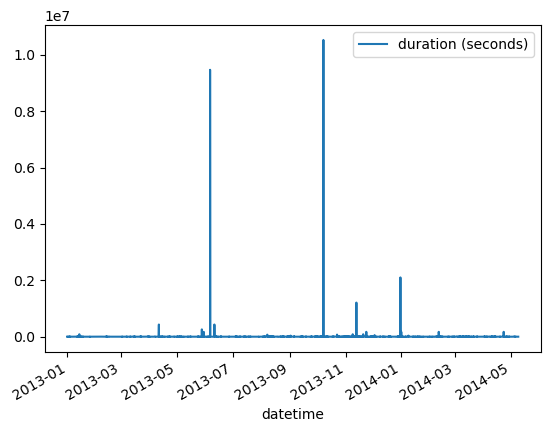

In [49]:
df_ts.plot(y='duration (seconds)')

# BOOKMARK: What should I plot? 
- Should I work with duration?
- Should I add a "count" column?
- Should I resample.size?

In [51]:
# ts = df_ts['duration (seconds)'].copy()
# ts

In [ ]:
ts.index

In [ ]:
ts.plot();

In [ ]:
plt.rcParams['figure.figsize'] = [10,5]

In [ ]:
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [ ]:
# ts.describe()

# SIFT THROUGH BELOW:

## Resampling

In [ ]:
freqs = ['h','d','w','m','3m']

for freq in freqs:
    ts_temp = ts.resample(freq).size()
    ts_temp.plot(title=freq, style='.-')
#     plt.show()

In [ ]:
ts_d = ufo_ts.loc['2000':].resample('d').size()
ts_d

In [ ]:
aggs = ['mean','count','median','last']
freq ='m'
fig, ax = plt.subplots()
for agg in aggs:
    ts_temp = ts_d.resample(freq).agg(agg).asfreq(freq)
    ts_temp.plot( style='.-', label=agg,ax=ax)
ax.legend()
    

In [ ]:
ts.index

In [ ]:
miss.matrix(ts.to_frame())

In [ ]:
## Resampling to Daily frequency
miss.matrix(ts.resample("D").last().to_frame())

In [ ]:
## Frequenciers 

In [ ]:
## Resample using mean()
ts_mean = ts.resample("D").mean()
ts_mean.plot()

In [ ]:
.agg("last")

In [ ]:
## Need to apply some sort of aggregation
ts_last = ts.resample("D").agg("last")
ts_last.plot()

# BOOKMARK [Debating resampling above first]

In [ ]:
idx_min_price = ts.idxmin()
idx_min_price

### Using Time Deltas

> We want to slice out a ts around the date with the minumum price. We want our slice to start 5 days before and end 5 days after.

In [ ]:
try:
    idx_min_price +'5 days'
except Exception as e:
    print(e)

In [ ]:
## Making a time delta with pd.to_tiemdelta
delta_days = pd.to_timedelta('5 days')
delta_days

In [ ]:
## Subtracting our delta to get start
start = idx_min_price - delta_days
start

In [ ]:
## adding our time delta to get the end
end = idx_min_price + delta_days
end

In [ ]:
## Annotating the time period we've selected on our entire ts
ax = ts.plot(title="Annotating Start and End Dates Calcualted with Timedeltas");
ax.axvline(start,ls='--',color='green', label='Start Date')
ax.axvline(end, ls='--',color='red',label='End Date')
ax.legend()

In [ ]:
## Slicing out the timeperiod and saving as eda_ts
eda_ts = ts.loc[start:end]
eda_ts

In [ ]:
# plt.rcParams['lines.markeredgecolor']='white'
# plt.rcParams['lines.markersize']=3
# plt.rcParams['lines.linewidth']=3

In [ ]:
ax = eda_ts.plot()

In [ ]:
eda_ts.plot(style='.--');

In [ ]:
eda_ts.plot(style='o');

> Why does it look the way it does??

In [ ]:
## There are no null values in the ts var...
eda_ts.isna().sum()

In [ ]:
eda_ts.index

In [ ]:
ts.index.freq

In [ ]:
eda_ts.fillna(method='ffill').plot(style='.')

In [ ]:
ts_min = ts.resample('min').asfreq()
ts_min

In [ ]:
miss.matrix(ts_min.to_frame())

In [ ]:
# ufo.iloc[388]

In [ ]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'], errors='coerce' )
# ufo = ufo.set_index("datetime")
ufo

In [ ]:
ufo['year'] = ufo['datetime'].dt.year
ufo['month'] = ufo['datetime'].dt.month

In [ ]:
ufo['year']

In [ ]:
ufo['year'].min()

In [ ]:
# decades = pd.date_range(start="1900",end='2020',freq='10y',)

In [ ]:
ufo['year']

In [ ]:
ufo['decade'] = ufo['year']- ufo['year']%10
ufo

In [ ]:
miss.matrix(ufo)

In [ ]:
ufo['decade'].value_counts()

In [ ]:
import plotly.express as px

In [ ]:
ufo['duration (seconds)'] = pd.to_numeric(ufo['duration (seconds)'],errors='coerce')


In [ ]:
ufo = ufo.sort_values('decade')

In [ ]:
# ufo = ufo.dropna(subset=['datetime'])

In [ ]:
px.scatter_geo(data_frame=ufo, lat='latitude',lon='longitude', animation_frame="decade")

In [ ]:
ts = ufo.set_index('datetime').resample('d').size()
ts.plot()

In [ ]:
ufo = ufo.dropna(subset=['datetime'])

In [ ]:
ufo_ts = ufo.set_index("datetime")
ufo_ts

In [ ]:
ts.rolling('30d').mean().plot()

In [ ]:
ts.rolling('30d').mean().plot()

In [ ]:
freqs = ['w','m','3m','y']

for freq in freqs:
    ts_temp = ufo_ts.loc['2000':].resample(freq).size()
    ts_temp.plot(title=freq, style='.-')
#     plt.show()

In [ ]:
ts_d = ufo_ts.loc['2000':].resample('d').size()
ts_d

In [ ]:
aggs = ['mean','count','median','last']
freq ='m'
fig, ax = plt.subplots()
for agg in aggs:
    ts_temp = ts_d.resample(freq).agg(agg).asfreq(freq)
    ts_temp.plot( style='.-', label=agg,ax=ax)
ax.legend()
    

In [ ]:
ufo_ts

In [ ]:
state_ts = ufo_ts.groupby('state').resample('w').size()
state_ts = state_ts.loc[['md','pa']]

In [ ]:
px.line(state_ts.unstack(0))

In [ ]:
# !pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays



In [ ]:
## making a date range that covers full dataset
all_days = pd.date_range(ufo_ts.index.min(), ufo_ts.index.max())
all_days

In [ ]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays


In [ ]:
ufo_ts.index.isna().sum()

In [ ]:
ufo_ts

In [ ]:
nat = np.datetime64('NaT')
nat

In [ ]:
# ufo_ts = 
ufo_ts = ufo_ts.loc[ufo_ts.index !=nat]
ufo_ts

In [ ]:
## Saving both holiday types as columns
ufo_ts["US Holiday"] = ufo_ts.index.map(us_holidays.get)
ufo_ts['US Holiday'].value_counts()

## Wide to Long

In [ ]:
crypto = pd.read_csv("Data/stocks/wide-form-crypto.csv")
crypto

In [ ]:
id_vars = crypto.columns[:3]
id_vars

In [ ]:
long_crypto = pd.melt(crypto,id_vars=id_vars)
long_crypto

In [ ]:
long_crypto = pd.melt(crypto,id_vars=id_vars,var_name='Date',value_name="Value")
long_crypto

In [ ]:
grouped_crypto = long_crypto.set_index(['CryptoCurrency','Date']).sort_index()
grouped_crypto

In [ ]:
long_crypto.groupby("CryptoCurrency").resample("D").asfreq("D")

# APPENDIX

# CUT

### Stock Data (S&P500)

- S&P 500 (Kibot) 
     - IVE S&P 500 1-min aggregate data from: http://www.kibot.com/free_historical_data.aspx

In [36]:
# sp500_min_df = pd.read_csv('Data/stocks/sp500_ive_min_tick_bidask.csv')
# sp500_min_df.head()

- Powerful, but slow function for converting data to datetime.

In [ ]:
# %%time
# ## Make a datetime index using pd.to_datetime
# sp500_min_df['Datetime'] = pd.to_datetime(sp500_min_df['Date']+' ' + sp500_min_df['Time'])
# sp500_min_df

- We can speed up the conversion by specifying the correct time format and setting `infer_datetime_format=False`

In [ ]:
# ## Creating/testing our time format
# fmt = "%m/%d/%Y %H:%M"
# converted_date_pandas.strftime(fmt)

In [ ]:
# %%time
# ## Make a datetime index using pd.to_datetime & specifying the format  (to save gtime)
# sp500_min_df['Datetime'] = pd.to_datetime(sp500_min_df['Date']+' ' + sp500_min_df['Time'],
#                                           format=fmt,
#                                          infer_datetime_format=False)
# sp500_min_df

In [ ]:
# ## Setting the datetime index and dropping original separate columns
# df_ts = sp500_min_df.set_index("Datetime")
# df_ts = df_ts.drop(columns=['Date','Time'])
# df_ts

In [ ]:
# ## Only keeping Closing Ask/Bid
# close_cols = [c for c in df_ts.columns if "Close" in c]

# df_ts = df_ts[close_cols]
# df_ts

- Bid vs Ask:
    - https://www.investopedia.com/ask/answers/042215/what-do-bid-and-ask-prices-represent-stock-quote.asp

### PandasDataReader

In [ ]:
start_date = '2001-01-01'
start_date

In [ ]:
# !pip install yfinance
import yfinance as yfin
yfin.pdr_override()

##  Pandas DataReader Import
import pandas_datareader.data as pdr

In [ ]:
# example use with new function
stock_data = pdr.get_data_yahoo('^GSPC',start_date, today_str)
stock_data